In [1]:
 import numpy as np
import pandas as pd

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Research/alternate_minimisation/type4_data/"

#data creation

In [4]:
# y = np.random.randint(0,10,5000)
# idx= []
# for i in range(10):
#     print(i,sum(y==i))
#     idx.append(y==i)

In [5]:
# x = np.zeros((5000,2))

# x[idx[0],:] = np.random.multivariate_normal(mean = [4,6.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[0]))

# x[idx[1],:] = np.random.multivariate_normal(mean = [5.5,6],cov=[[0.01,0],[0,0.01]],size=sum(idx[1]))

# x[idx[2],:] = np.random.multivariate_normal(mean = [4.5,4.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[2]))

# x[idx[3],:] = np.random.multivariate_normal(mean = [3,3.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[3]))

# x[idx[4],:] = np.random.multivariate_normal(mean = [2.5,5.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[4]))

# x[idx[5],:] = np.random.multivariate_normal(mean = [3.5,8],cov=[[0.01,0],[0,0.01]],size=sum(idx[5]))

# x[idx[6],:] = np.random.multivariate_normal(mean = [5.5,8],cov=[[0.01,0],[0,0.01]],size=sum(idx[6]))

# x[idx[7],:] = np.random.multivariate_normal(mean = [7,6.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[7]))

# x[idx[8],:] = np.random.multivariate_normal(mean = [6.5,4.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[8]))

# x[idx[9],:] = np.random.multivariate_normal(mean = [5,3],cov=[[0.01,0],[0,0.01]],size=sum(idx[9]))

In [6]:
# plt.figure(figsize=(6,6))
# for i in range(10):
#     plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [7]:
# class SyntheticDataset(Dataset):
#   """MosaicDataset dataset."""

#   def __init__(self, x, y):
#     """
#       Args:
#         csv_file (string): Path to the csv file with annotations.
#         root_dir (string): Directory with all the images.
#         transform (callable, optional): Optional transform to be applied
#             on a sample.
#     """
#     self.x = x
#     self.y = y
#     #self.fore_idx = fore_idx
    
#   def __len__(self):
#     return len(self.y)

#   def __getitem__(self, idx):
#     return self.x[idx] , self.y[idx] #, self.fore_idx[idx]

In [8]:
# trainset = SyntheticDataset(x,y)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
# classes = ('zero','one','two','three','four','five','six','seven','eight','nine')

# foreground_classes = {'zero','one','two'}
# fg_used = '012'
# fg1, fg2, fg3 = 0,1,2


# all_classes = {'zero','one','two','three','four','five','six','seven','eight','nine'}
# background_classes = all_classes - foreground_classes
# background_classes

In [9]:
# dataiter = iter(trainloader)
# background_data=[]
# background_label=[]
# foreground_data=[]
# foreground_label=[]
# batch_size=100

# for i in range(50):
#   images, labels = dataiter.next()
#   for j in range(batch_size):
#     if(classes[labels[j]] in background_classes):
#       img = images[j].tolist()
#       background_data.append(img)
#       background_label.append(labels[j])
#     else:
#       img = images[j].tolist()
#       foreground_data.append(img)
#       foreground_label.append(labels[j])
            
# foreground_data = torch.tensor(foreground_data)
# foreground_label = torch.tensor(foreground_label)
# background_data = torch.tensor(background_data)
# background_label = torch.tensor(background_label)

In [10]:
# def create_mosaic_img(bg_idx,fg_idx,fg): 
#   """
#   bg_idx : list of indexes of background_data[] to be used as background images in mosaic
#   fg_idx : index of image to be used as foreground image from foreground data
#   fg : at what position/index foreground image has to be stored out of 0-8
#   """
#   image_list=[]
#   j=0
#   for i in range(9):
#     if i != fg:
#       image_list.append(background_data[bg_idx[j]])
#       j+=1
#     else: 
#       image_list.append(foreground_data[fg_idx])
#       label = foreground_label[fg_idx] - fg1  # minus fg1 because our fore ground classes are fg1,fg2,fg3 but we have to store it as 0,1,2
#   #image_list = np.concatenate(image_list ,axis=0)
#   image_list = torch.stack(image_list) 
#   return image_list,label

In [11]:
# # number of data points in bg class and fg class
# nbg = sum(idx[3]) + sum(idx[4]) + sum(idx[5]) + sum(idx[6]) + sum(idx[7]) + sum(idx[8]) + sum(idx[9])
# nfg   = sum(idx[0]) + sum(idx[1]) + sum(idx[2])

# print(nbg, nfg, nbg+nfg)

In [12]:
# desired_num = 3000
# mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
# fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
# mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
# list_set_labels = [] 
# for i in range(desired_num):
#   set_idx = set()
#   np.random.seed(i)
#   bg_idx = np.random.randint(0,nbg,8)
#   set_idx = set(background_label[bg_idx].tolist())
#   fg_idx = np.random.randint(0,nfg)
#   set_idx.add(foreground_label[fg_idx].item())
#   fg = np.random.randint(0,9)
#   fore_idx.append(fg)
#   image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
#   mosaic_list_of_images.append(image_list)
#   mosaic_label.append(label)
#   list_set_labels.append(set_idx)


In [13]:
# desired_num = 2000
# test_mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
# test_fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
# test_mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
# test_list_set_labels = [] 
# for i in range(desired_num):
#   set_idx = set()
#   np.random.seed(i+3000)
#   bg_idx = np.random.randint(0,nbg,8)
#   set_idx = set(background_label[bg_idx].tolist())
#   fg_idx = np.random.randint(0,nfg)
#   set_idx.add(foreground_label[fg_idx].item())
#   fg = np.random.randint(0,9)
#   test_fore_idx.append(fg)
#   test_image_list,test_label = create_mosaic_img(bg_idx,fg_idx,fg)
#   test_mosaic_list_of_images.append(test_image_list)
#   test_mosaic_label.append(test_label)
#   test_list_set_labels.append(set_idx)


In [14]:
# data =  [{"mosaic_list":mosaic_list_of_images, "mosaic_label": mosaic_label, "fore_idx":fore_idx}]
# np.save(path+"train_type4_data.npy",data)

In [15]:
# data =  [{"mosaic_list":test_mosaic_list_of_images, "mosaic_label": test_mosaic_label, "fore_idx":test_fore_idx}]
# np.save(path+"test_type4_data.npy",data)

In [16]:
# data = [{"X":x,"Y":y}]
# np.save(path+"type_4_data.npy",data)

# Data loading

In [17]:
class MosaicDataset1(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label,fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    self.fore_idx = fore_idx
    
  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx] , self.fore_idx[idx]

In [18]:
class SyntheticDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, x, y):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.x = x
    self.y = y
    #self.fore_idx = fore_idx
    
  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    return self.x[idx] , self.y[idx] #, self.fore_idx[idx]

In [19]:
train_data = np.load(path+"train_type4_data.npy",allow_pickle=True)
test_data = np.load(path+"test_type4_data.npy",allow_pickle=True)
data = np.load(path+"type_4_data.npy",allow_pickle=True)

In [20]:
train_mosaic_list_of_images = train_data[0]["mosaic_list"]
train_mosaic_label = train_data[0]["mosaic_label"]
train_fore_idx = train_data[0]["fore_idx"]


test_mosaic_list_of_images = test_data[0]["mosaic_list"]
test_mosaic_label = test_data[0]["mosaic_label"]
test_fore_idx = test_data[0]["fore_idx"]
X = data[0]["X"]
Y = data[0]["Y"]

In [21]:
batch = 250
tr_msd = MosaicDataset1(train_mosaic_list_of_images, train_mosaic_label, train_fore_idx)
train_loader = DataLoader( tr_msd,batch_size= batch ,shuffle=True)

In [22]:
batch = 250
tst_msd = MosaicDataset1(test_mosaic_list_of_images, test_mosaic_label, test_fore_idx)
test_loader = DataLoader( tst_msd,batch_size= batch ,shuffle=True)

In [23]:
dset = SyntheticDataset(X,Y)
dtloader = DataLoader(dset,batch_size =batch,shuffle=True )

In [24]:
def calculate_loss(dataloader,model,criter):
  model.eval()
  r_loss = 0
  with torch.no_grad():
    for i, data in enumerate(dataloader, 0):
      inputs, labels = data
      inputs, labels = inputs.to("cuda"),labels.to("cuda")
      outputs = model(inputs)
      loss = criter(outputs, labels)
      r_loss += loss.item()
  return r_loss/i

**Focus Net**

In [25]:
class Module1(nn.Module):
  def __init__(self):
    super(Module1, self).__init__()
    self.fc1 = nn.Linear(2, 100)
    self.fc2 = nn.Linear(100, 1)

  def forward(self, z):
    x = torch.zeros([batch,9],dtype=torch.float64)
    y = torch.zeros([batch,2], dtype=torch.float64)
    x,y = x.to("cuda"),y.to("cuda")
    for i in range(9):
      x[:,i] = self.helper(z[:,i])[:,0]
    x = F.softmax(x,dim=1)   # alphas
    

    for i in range(9):            
      x1 = x[:,i]          
      y = y + torch.mul(x1[:,None],z[:,i])
    return y , x 
  
  def helper(self,x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x
      


**Classification Net**

In [26]:
 class Module2(nn.Module):
  def __init__(self):
    super(Module2, self).__init__()
    self.fc1 = nn.Linear(2, 100)
    self.fc2 = nn.Linear(100, 3)

  def forward(self,y):  
    y = F.relu(self.fc1(y))
    y = self.fc2(y)
    return y


In [27]:
def calculate_attn_loss(dataloader,what,where,criter):
  what.eval()
  where.eval()
  r_loss = 0
  alphas = []
  lbls = []
  pred = []
  fidices = []
  with torch.no_grad():
    for i, data in enumerate(dataloader, 0):
      inputs, labels,fidx = data
      lbls.append(labels)
      fidices.append(fidx)
      inputs = inputs.double()
      inputs, labels = inputs.to("cuda"),labels.to("cuda")
      avg,alpha = where(inputs)
      outputs = what(avg)
      _, predicted = torch.max(outputs.data, 1)
      pred.append(predicted.cpu().numpy())
      alphas.append(alpha.cpu().numpy())
      loss = criter(outputs, labels)
      r_loss += loss.item()
  alphas = np.concatenate(alphas,axis=0)
  pred = np.concatenate(pred,axis=0)
  lbls = np.concatenate(lbls,axis=0)
  fidices = np.concatenate(fidices,axis=0)
  #print(alphas.shape,pred.shape,lbls.shape,fidices.shape) 
  analysis = analyse_data(alphas,lbls,pred,fidices)
  return r_loss/i,analysis

In [28]:
def analyse_data(alphas,lbls,predicted,f_idx):
    '''
       analysis data is created here
    '''
    batch = len(predicted)
    amth,alth,ftpt,ffpt,ftpf,ffpf = 0,0,0,0,0,0
    for j in range (batch):
      focus = np.argmax(alphas[j])
      if(alphas[j][focus] >= 0.5):
        amth +=1
      else:
        alth +=1
      if(focus == f_idx[j] and predicted[j] == lbls[j]):
        ftpt += 1
      elif(focus != f_idx[j] and predicted[j] == lbls[j]):
        ffpt +=1
      elif(focus == f_idx[j] and predicted[j] != lbls[j]):
        ftpf +=1
      elif(focus != f_idx[j] and predicted[j] != lbls[j]):
        ffpf +=1
    #print(sum(predicted==lbls),ftpt+ffpt)
    return [ftpt,ffpt,ftpf,ffpf,amth,alth]

In [29]:
number_runs = 10
full_analysis =[]
FTPT_analysis = pd.DataFrame(columns = ["FTPT","FFPT", "FTPF","FFPF"])

every_what_epoch = 10 #to change

for n in range(number_runs):
  print("--"*40)
  
  # instantiate focus and classification Model
  torch.manual_seed(n)
  where = Module1().double()
  torch.manual_seed(n)
  what = Module2().double()
  where = where.to("cuda")
  what = what.to("cuda")



  # instantiate optimizer
  optimizer_where = optim.Adam(where.parameters(),lr =0.001)
  optimizer_what = optim.Adam(what.parameters(), lr=0.001)
  criterion = nn.CrossEntropyLoss()
  acti = []
  analysis_data = []
  loss_curi = []
  epochs = 1000


  # calculate zeroth epoch loss and FTPT values
  running_loss,anlys_data = calculate_attn_loss(train_loader,what,where,criterion)
  loss_curi.append(running_loss)
  analysis_data.append(anlys_data)

  print('epoch: [%d ] loss: %.3f' %(0,running_loss)) 

  # training starts 
  for epoch in range(epochs): # loop over the dataset multiple times
    ep_lossi = []
    running_loss = 0.0
    what.train()
    where.train()
    if ((epoch) % (every_what_epoch*2) ) <= every_what_epoch-1 :
      print(epoch+1,"updating where_net, what_net is freezed")
      print("--"*40)
    elif ((epoch) % (every_what_epoch*2)) > every_what_epoch-1 :
      print(epoch+1,"updating what_net, where_net is freezed")
      print("--"*40)
    for i, data in enumerate(train_loader, 0):
      # get the inputs
      inputs, labels,_ = data
      inputs = inputs.double()
      inputs, labels = inputs.to("cuda"),labels.to("cuda")

      # zero the parameter gradients
      optimizer_where.zero_grad()
      optimizer_what.zero_grad()
      
      # forward + backward + optimize
      avg, alpha = where(inputs)
      outputs = what(avg)
      loss = criterion(outputs, labels)

      # print statistics
      running_loss += loss.item()
      loss.backward()

      if ((epoch) % (every_what_epoch*2) ) <= every_what_epoch-1 :
        optimizer_where.step()
      elif ( (epoch) % (every_what_epoch*2)) > every_what_epoch-1 :
        optimizer_what.step()
      # optimizer_where.step()
      # optimizer_what.step()

    running_loss,anls_data = calculate_attn_loss(train_loader,what,where,criterion)
    analysis_data.append(anls_data)
    print('epoch: [%d] loss: %.3f' %(epoch + 1,running_loss)) 
    loss_curi.append(running_loss)   #loss per epoch
    if running_loss<=0.01:
      break
  print('Finished Training run ' +str(n))
  analysis_data = np.array(analysis_data)
  FTPT_analysis.loc[n] = analysis_data[-1,:4]/30
  full_analysis.append((epoch, analysis_data))
  correct = 0
  total = 0
  with torch.no_grad():
    for data in train_loader:
      images, labels,_ = data
      images = images.double()
      images, labels = images.to("cuda"), labels.to("cuda")
      avg, alpha = where(images)
      outputs  = what(avg)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  print('Accuracy of the network on the 3000 train images: %d %%' % (  100 * correct / total))
    

Streaming output truncated to the last 5000 lines.
--------------------------------------------------------------------------------
epoch: [336] loss: 0.877
337 updating what_net, where_net is freezed
--------------------------------------------------------------------------------
epoch: [337] loss: 0.876
338 updating what_net, where_net is freezed
--------------------------------------------------------------------------------
epoch: [338] loss: 0.874
339 updating what_net, where_net is freezed
--------------------------------------------------------------------------------
epoch: [339] loss: 0.873
340 updating what_net, where_net is freezed
--------------------------------------------------------------------------------
epoch: [340] loss: 0.870
341 updating where_net, what_net is freezed
--------------------------------------------------------------------------------
epoch: [341] loss: 0.866
342 updating where_net, what_net is freezed
-------------------------------------------------

In [30]:
a,b= full_analysis[0]
print(a)

999


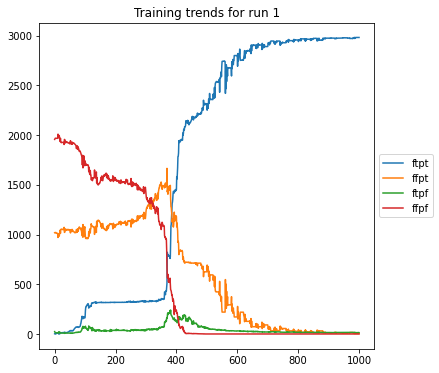

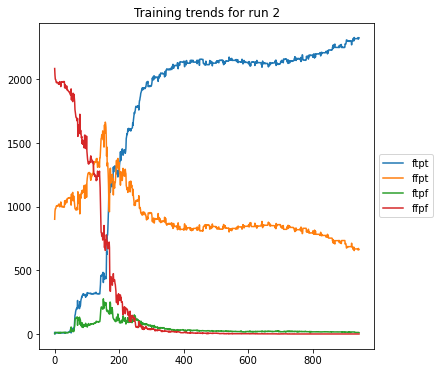

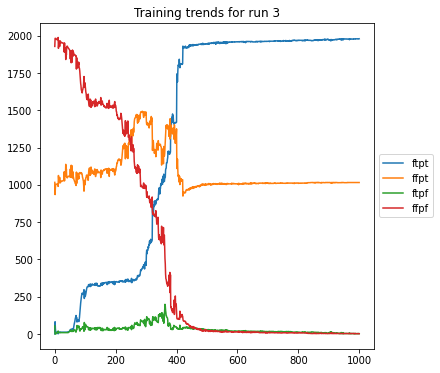

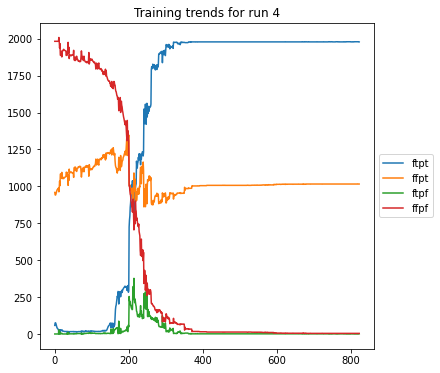

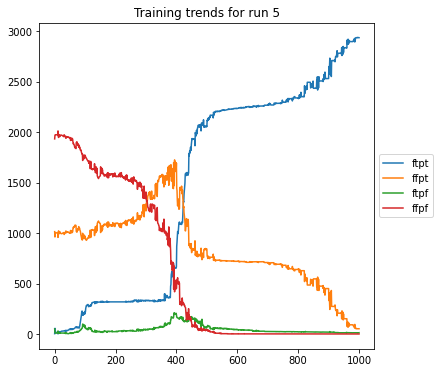

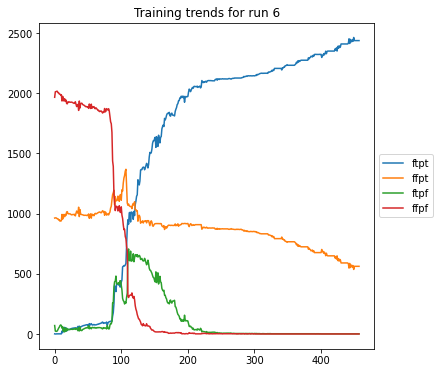

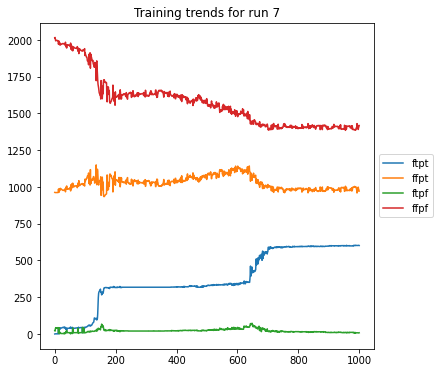

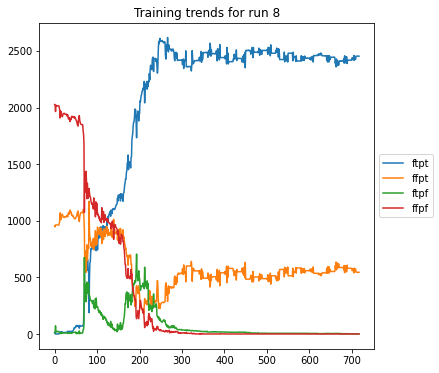

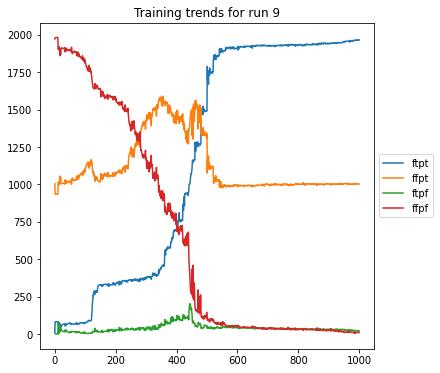

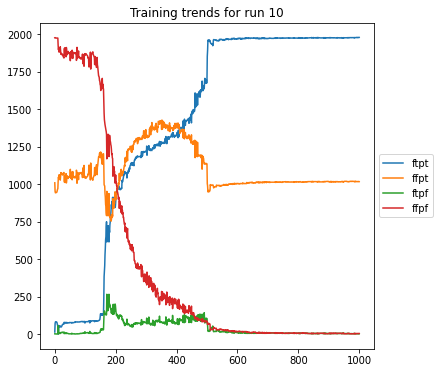

In [31]:
cnt=1
for epoch, analysis_data in full_analysis:
  analysis_data = np.array(analysis_data)
  # print("="*20+"run ",cnt,"="*20)
  
  plt.figure(figsize=(6,6))
  plt.plot(np.arange(0,epoch+2,1),analysis_data[:,0],label="ftpt")
  plt.plot(np.arange(0,epoch+2,1),analysis_data[:,1],label="ffpt")
  plt.plot(np.arange(0,epoch+2,1),analysis_data[:,2],label="ftpf")
  plt.plot(np.arange(0,epoch+2,1),analysis_data[:,3],label="ffpf")

  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.title("Training trends for run "+str(cnt))
  plt.savefig(path+"where_what/every10/run"+str(cnt)+".png",bbox_inches="tight")
  plt.savefig(path+"where_what/every10/run"+str(cnt)+".pdf",bbox_inches="tight")
  cnt+=1


In [32]:
np.mean(np.array(FTPT_analysis),axis=0) #[43.  , 33.47,  0.09, 23.44]

array([72.13333333, 22.83666667,  0.24      ,  4.79      ])

In [33]:
FTPT_analysis.to_csv(path+"where_what/FTPT_analysis_ever++y10"+".csv",index=False)

In [34]:
FTPT_analysis

,FTPT,FFPT,FTPF,FFPF
0,99.366667,0.166667,0.466667,0.000000
1,77.533333,22.100000,0.366667,0.000000
2,66.000000,33.866667,0.066667,0.066667
3,65.966667,33.866667,0.033333,0.133333
4,97.866667,1.733333,0.400000,0.000000
5,81.233333,18.733333,0.033333,0.000000
6,20.066667,32.400000,0.266667,47.266667
7,81.800000,18.166667,0.033333,0.000000
8,65.533333,33.433333,0.700000,0.333333
9,65.966667,33.900000,0.033333,0.100000
